In [7]:
from initial_classif.trainset.variable_training_sets import *

In [101]:
v = load_all_variable_stars().sort_values(by='virac2_id').reset_index(drop=True)

In [102]:
print(np.unique(v['var_class']))

['CEP' 'DSCT' 'EA/EB' 'EW' 'Ell' 'MIRA' 'OSARG' 'RRab' 'RRc' 'RRd' 'SRV'
 'T2CEP']


In [103]:
v[['virac2_id','var_class']].groupby('var_class').agg('count')

,virac2_id
var_class,
CEP,729
DSCT,294
EA/EB,326556
EW,82813
Ell,24268
MIRA,4164
OSARG,181244
RRab,25474
RRc,10728


In [91]:
from initial_classif.trainset.gaia_extraction import *
import sys
sys.path.append('../../../')
from virac_utils import wsdb_kwargs, wrap, betw

In [66]:
g = generate_gaia_training_set(359.8,2,0.04*60.,0.1*60,50.,**wsdb_kwargs)

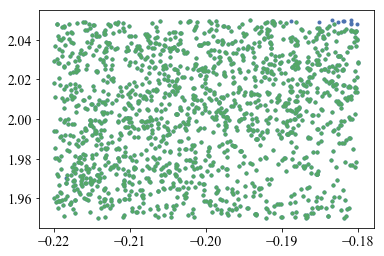

In [67]:
plt.plot(wrap(g['l']),g['b'],'.')
plt.plot(wrap(g['l'][g['ks_kurtosis']>-1000]),g['b'][g['ks_kurtosis']>-1000],'.')

In [84]:
np.count_nonzero(betw(wrap(v['l'],-0.22,-0.18)))

KeyError: 'l'

In [89]:
from interface_utils.add_stats import *

In [108]:
dsetsV = cm_virac(v[['virac2_id']],**wsdb_kwargs)

In [109]:
dsetsV

[autoreload of initial_classif.trainset.variable_training_sets failed: Traceback (most recent call last):
  File "/data/jls/python3.5/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/data/jls/python3.5/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/ioa/software/python/3.5.2/lib/python3.5/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/ioa/software/python/3.5.2/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 665, in exec_module
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "/home/jls/work/data/gaiadr2/virac/variability/thomas/virac_classifier/initial_classif/trainset/variable_training_sets.py", line 1, in <module>
    from c

,sourceid,sourceid_1,astfit_epochs,astfit_params,duplicate,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,ks_n_ambiguous,ks_n_phot,ks_n_chilt5,ks_med_mag,ks_mean_mag,ks_ivw_mean_mag,ks_chilt5_ivw_mean_mag,ks_std_mag,ks_mad_mag,ks_ivw_err_mag,ks_chilt5_ivw_err_mag,ivw_mean_contemp_j_ks,ivw_mean_contemp_h_ks,l,b
0,8168419001320,8168419001320,84,5,0,2014.000000,267.502448,1.637432,-17.365234,1.461480,0.982111,1.807580,0.365736,0.991792,-3.028722,...,0,84,84,14.504400,14.580400,14.545400,14.545400,0.181645,0.113482,0.002251,0.002251,NaN,NaN,10.449761,5.098131
1,8172515004314,8172515004314,70,5,0,2014.000000,267.469230,7.310912,-17.406857,6.005355,-1.409592,7.910430,-2.413327,4.419185,-0.237504,...,0,70,70,16.696199,16.701599,16.669300,16.669300,0.177151,0.130354,0.011156,0.011156,NaN,NaN,10.397601,5.104312
2,8172515032410,8172515032410,83,5,0,2014.000000,267.468962,3.976898,-17.408101,3.326274,-4.930220,4.442579,-9.316758,2.464747,-1.632502,...,0,83,83,15.826200,15.850100,15.816700,15.816700,0.117029,0.090124,0.005426,0.005426,NaN,NaN,10.396395,5.103900
3,8172516007574,8172516007574,2,2,0,2012.126251,267.520800,87.434851,-17.389448,48.356130,NaN,NaN,NaN,NaN,NaN,...,0,2,0,11.454800,11.454800,11.446700,NaN,0.066497,0.066497,0.051084,NaN,NaN,NaN,10.437739,5.070750
4,8172516013354,8172516013354,83,5,0,2014.000000,267.567704,5.273036,-17.377702,4.372319,0.555112,5.970710,-3.146594,3.180158,-4.521389,...,0,83,83,16.039400,16.064400,16.044300,16.044300,0.143281,0.093331,0.006309,0.006309,NaN,NaN,10.470700,5.038138
5,8172517034043,8172517034043,132,5,0,2014.000000,267.615947,5.899392,-17.389645,4.800361,27.269735,6.392987,0.209929,3.628298,-3.357706,...,0,132,132,16.692499,16.701799,16.667999,16.667999,0.146228,0.103683,0.007684,0.007684,NaN,NaN,10.483804,4.992401
6,8176611013090,8176611013090,77,5,0,2014.000000,267.502680,2.427116,-17.441822,2.179620,-0.986704,2.697833,-3.621635,1.463844,-3.896370,...,0,78,78,14.777700,14.821300,14.812600,14.812600,0.120388,0.042637,0.002237,0.002237,NaN,NaN,10.383626,5.059064
7,8176612018813,8176612018813,82,5,0,2014.000000,267.548250,1.389444,-17.419351,1.241634,-1.126903,1.518616,-4.148952,0.823228,-6.887264,...,0,82,82,14.000700,14.003000,13.997000,13.997000,0.055596,0.044024,0.001594,0.001594,NaN,NaN,10.425215,5.033006
8,8176612025020,8176612025020,25,5,0,2014.000000,267.574679,9.958011,-17.420493,9.883543,0.375752,8.442707,-1.170456,6.487521,0.426652,...,0,26,15,15.762200,15.781100,15.765800,15.743800,0.148415,0.125545,0.025839,0.030985,NaN,NaN,10.437069,5.010696
9,8176613001481,8176613001481,234,5,0,2014.000000,267.673527,1.486150,-17.424859,1.270795,-1.819285,1.680736,-5.694063,0.951361,-6.885544,...,0,234,234,15.045400,15.082600,15.053700,15.053700,0.132523,0.083488,0.001866,0.001866,NaN,NaN,10.481289,4.927190


In [87]:
dsets = cm_virac_stats_table(v[:10],**wsdb_kwargs)

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))


In [82]:
dsets

,sourceid,sourceid_1,ks_n_epochs,ks_mean,ks_stdev,ks_kurtosis,ks_skew,ks_p0,ks_p1,ks_p2,ks_p4,ks_p5,ks_p8,ks_p16,ks_p25,...,ks_pspl_max_loglike_pspl,ks_pspl_mle_constant_mag,ks_pspl_max_loglike_constant_mag,ks_pspl_mean_loglike_outside_two_te,ks_pspl_std_loglike_outside_two_te,ks_pspl_mean_loglike_outside_three_te,ks_pspl_std_loglike_outside_three_te,ks_pspl_count_range_inf_3te_b,ks_pspl_count_range_3te_2te_b,ks_pspl_count_range_2te_1te_b,ks_pspl_count_range_1te_0te_b,ks_pspl_count_range_0te_1te_a,ks_pspl_count_range_1te_2te_a,ks_pspl_count_range_2te_3te_a,ks_pspl_count_range_3te_inf_a
0,9687908003745,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,9704292009014,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,9687909007255,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,9671526003829,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,9683814001020,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
5,9700198005796,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
6,9696104011358,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
7,9675624008915,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
8,9712489001605,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
9,9671529014837,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
